In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/NLP CLASS/A 1")
print(os.getcwd())

/content/drive/MyDrive/NLP CLASS/A 1


In [3]:
import numpy as np
import pandas as pd

In [4]:
# Load the dataset
df = pd.read_csv("final_combined_dataset.csv")

In [5]:
# Display basic info
print("Dataset Info:\n", df.info())
print("\nFirst 5 rows:\n", df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10244 entries, 0 to 10243
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10244 non-null  object
 1   label   10244 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 160.2+ KB
Dataset Info:
 None

First 5 rows:
                                                 text  label
0  In the Vigenre cipher, a polyalphabetic cipher...      0
1  the carriage came to the door, my uncle was ca...      0
2  some partiality, especially on Lydias side, bu...      0
3  her there, Natsha ran to the nursery, but Snya...      0
4  What are the ethical concerns related to unive...      1


In [6]:
# Check class distribution
print("\nClass Distribution:\n", df['label'].value_counts(normalize=True))


Class Distribution:
 label
0    0.502929
1    0.497071
Name: proportion, dtype: float64


In [7]:
import re

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove multiple spaces
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)  # Remove special characters
    return text.strip()

# Apply text cleaning
df['text'] = df['text'].apply(clean_text)

# Display sample cleaned text
print("\nCleaned Text Samples:\n", df['text'].head())


Cleaned Text Samples:
 0    in the vigenre cipher a polyalphabetic cipher ...
1    the carriage came to the door my uncle was cal...
2    some partiality especially on lydias side but ...
3    her there natsha ran to the nursery but snya w...
4    what are the ethical concerns related to unive...
Name: text, dtype: object


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Define parameters
vocab_size = 10000  # Maximum unique words to consider
max_length = 200  # Limit sequence length to 200 words

# Tokenizer Initialization
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding="post", truncating="post")

# Convert labels to numpy array
labels = np.array(df['label'])

# Split into training, validation, and test sets (64% train, 16% validation, 20% test)
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print dataset shapes
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (6556, 200), (6556,)
Validation set: (1639, 200), (1639,)
Test set: (2049, 200), (2049,)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

# Define LSTM Model
model_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_shape=(max_length,)),  # Word Embeddings
    Bidirectional(LSTM(64, return_sequences=True)),  # First LSTM Layer
    Bidirectional(LSTM(32)),  # Second LSTM Layer
    Dense(64, activation="relu"),  # Fully Connected Layer
    Dropout(0.5),  # Dropout for regularization
    Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile Model
model_lstm.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Display Model Summary
model_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 200, 128)            │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,424,257 (5.43 MB)

 Trainable params: 1,424,257 (5.43 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Define batch size and number of epochs
batch_size = 32
epochs = 10  # You can increase it if needed

# Train the model
history = model_lstm.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.8507 - loss: 0.2805 - val_accuracy: 0.9994 - val_loss: 7.4023e-04
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 1.0000 - loss: 8.3477e-04 - val_accuracy: 0.9994 - val_loss: 4.8788e-04
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 1.0000 - loss: 3.3377e-04 - val_accuracy: 1.0000 - val_loss: 3.5375e-04
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 1.0000 - loss: 2.0787e-04 - val_accuracy: 1.0000 - val_loss: 7.1424e-05
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 1.0000 - loss: 8.7946e-05 - val_accuracy: 1.0000 - val_loss: 1.6894e-04
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 1.0000 - loss: 1.3836e-04 - val_accuracy: 1.0000 - val_loss: 1.1913e-04
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 1.0000 - loss: 8.9769e-05 - val_accuracy: 1.0000 - val_loss: 9.9118e-05
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 6

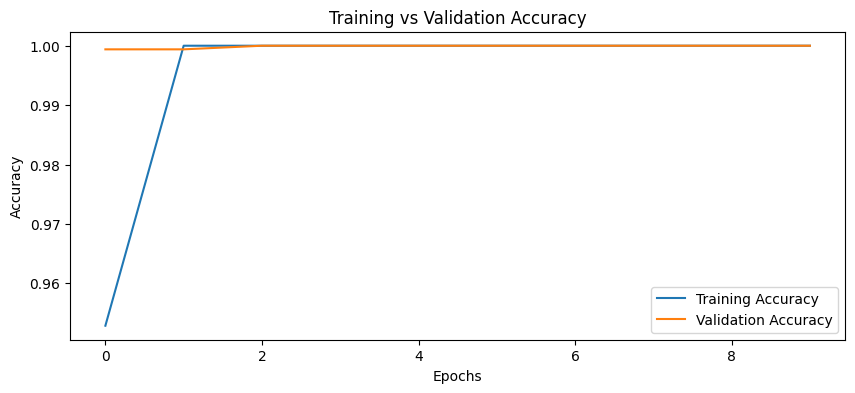

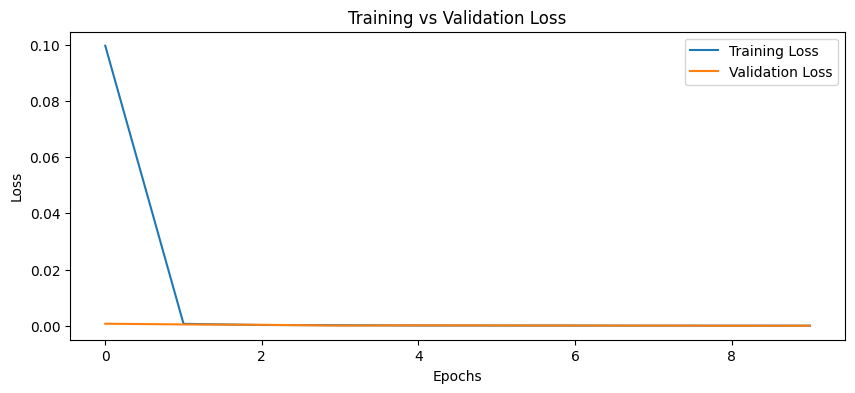

In [11]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Plot Loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [12]:
model_lstm.save("lstm_text_classifier.h5")
print("Model saved successfully!")

Model saved successfully!


Again, as in Data Analysis, seems to over fitting

TESTING OVERLAP

In [13]:
train_set = set(map(tuple, X_train))
val_set = set(map(tuple, X_val))
test_set = set(map(tuple, X_test))

print("Train & Val Overlap:", len(train_set.intersection(val_set)))
print("Train & Test Overlap:", len(train_set.intersection(test_set)))
print("Val & Test Overlap:", len(val_set.intersection(test_set)))

Train & Val Overlap: 0
Train & Test Overlap: 0
Val & Test Overlap: 0


RETRAINING JUST TO MAKE SURE

By reducing LSTM size

Increasing Dropout

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

# Define a better LSTM model to prevent overfitting
model_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_shape=(max_length,)),  # Word Embeddings
    Bidirectional(LSTM(32, return_sequences=True)),  # Reduce LSTM size
    Dropout(0.5),  # Increase dropout
    Bidirectional(LSTM(16)),  # Reduce LSTM size
    Dropout(0.5),
    Dense(32, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")  # Output layer
])

# Compile the model
model_lstm.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Reduce learning rate
    metrics=["accuracy"]
)

# Early Stopping Callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Retrain the model
history = model_lstm.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20, batch_size=32,
    callbacks=[early_stop]
)

# Save the model
model_lstm.save("lstm_text_classifier_fixed.h5")
print("Model retrained and saved!")

Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7564 - loss: 0.4840 - val_accuracy: 0.9988 - val_loss: 0.0066
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9990 - loss: 0.0174 - val_accuracy: 0.9988 - val_loss: 0.0063
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 4.8505e-05
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9999 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 1.7874e-05
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 6.6406e-06
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 2.7983e-06
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 1.0000 - loss: 8.7318e-04 - val_accuracy: 1.0000 - val_loss: 1.2131e-06
Epoch 8/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 1.0

Model retrained and saved!


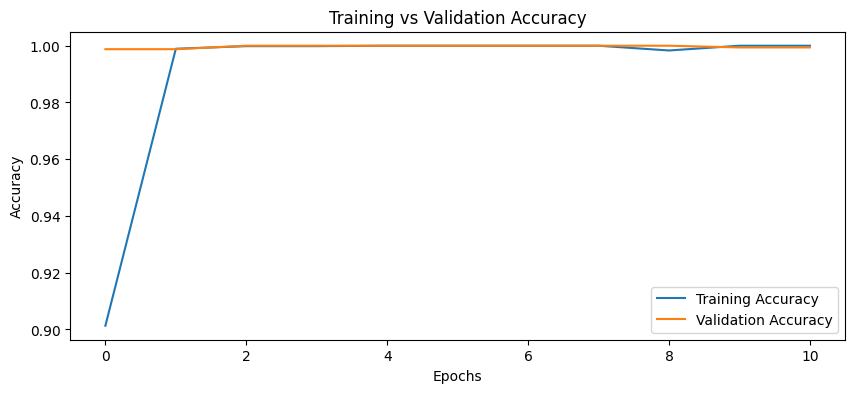

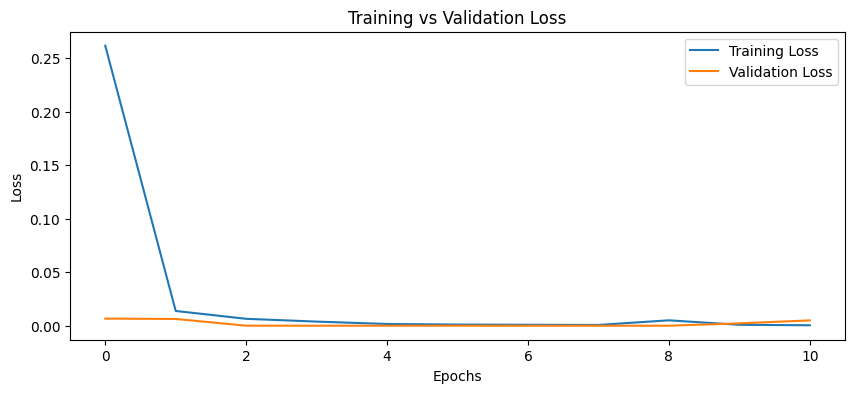

In [15]:
import matplotlib.pyplot as plt

# Plot Training vs Validation Accuracy
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Plot Training vs Validation Loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


Still seems to be overfitting, Making a last try with further reduction

In [16]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Define a more regularized LSTM model
model_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_shape=(max_length,)),
    Bidirectional(LSTM(16, return_sequences=True, kernel_regularizer=l2(0.01))),  # L2 regularization
    Dropout(0.6),
    Bidirectional(LSTM(8, kernel_regularizer=l2(0.01))),
    Dropout(0.6),
    Dense(16, activation="relu", kernel_regularizer=l2(0.01)),  # Regularization
    Dropout(0.6),
    Dense(1, activation="sigmoid")
])

# Compile with a lower learning rate
model_lstm.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Reduce learning rate
    metrics=["accuracy"]
)

# Train with Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model_lstm.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20, batch_size=32,
    callbacks=[early_stop]
)

# Save new model
model_lstm.save("lstm_text_classifier_final.h5")
print("Model retrained with stronger regularization!")

Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.5659 - loss: 3.0144 - val_accuracy: 0.9774 - val_loss: 2.5088
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.7538 - loss: 2.3579 - val_accuracy: 0.9549 - val_loss: 1.7869
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.8461 - loss: 1.7508 - val_accuracy: 0.9933 - val_loss: 1.3193
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8901 - loss: 1.3479 - val_accuracy: 0.9976 - val_loss: 0.9759
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9279 - loss: 1.0448 - val_accuracy: 0.9976 - val_loss: 0.7401
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9455 - loss: 0.8289 - val_accuracy: 1.0000 - val_loss: 0.5661
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9600 - loss: 0.6584 - val_accuracy: 1.0000 - val_loss: 0.4404
Epoch 8/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9702 - loss: 0.5302 - val

Model retrained with stronger regularization!


This time results look more like what we can expect in reality. But still accuracy seems to good to be true.

Plotting Again

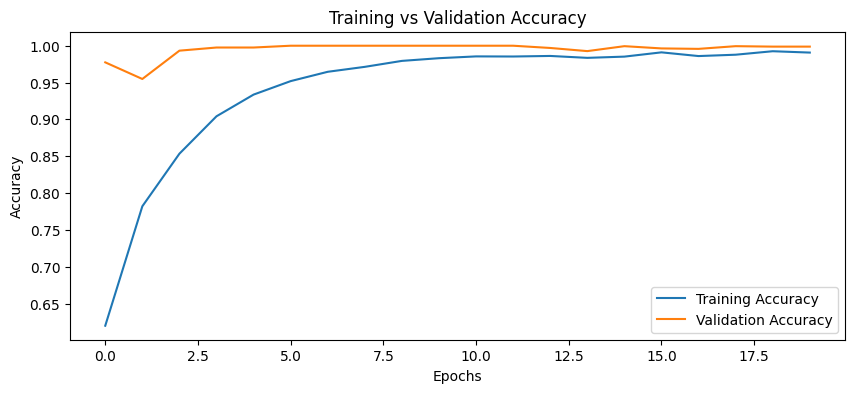

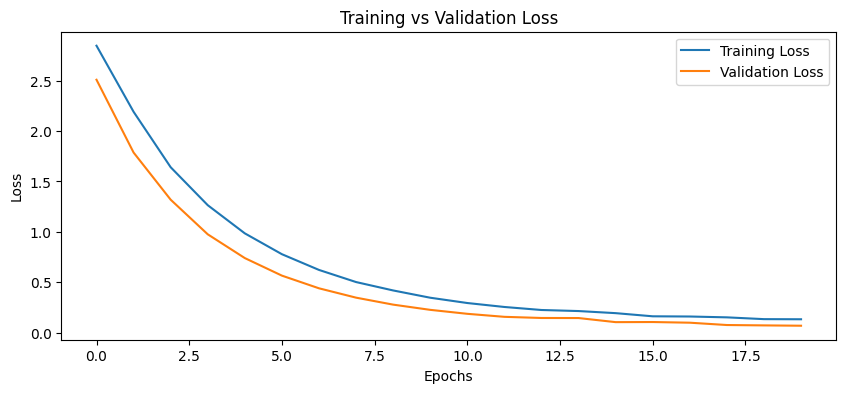

In [17]:
# Plot Training vs Validation Accuracy
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Plot Training vs Validation Loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

Evaluating on Test Data

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Predict on test set
y_pred_prob = model_lstm.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Convert probabilities to binary

# Print accuracy
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_acc:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step
Test Accuracy: 0.9985

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1063
           1       1.00      1.00      1.00       986

    accuracy                           1.00      2049
   macro avg       1.00      1.00      1.00      2049
weighted avg       1.00      1.00      1.00      2049



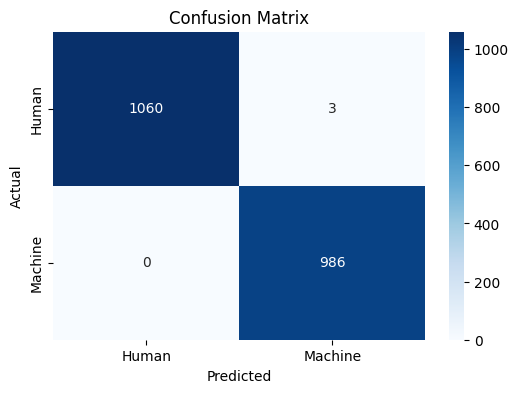

In [19]:
import matplotlib.pyplot as plt

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


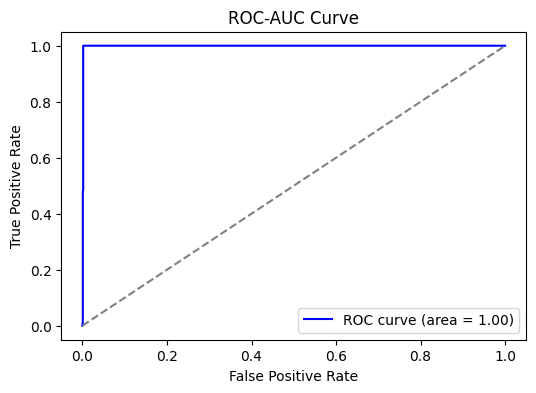

In [20]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend(loc="lower right")
plt.show()

In Reality text classification models should not achieve perfect accuracy.
Meaning, my training and validation data might not be diverse enough. But since I collected everything from different resources, maybe the models are already trained on wikipedia and books data.

Method Analysis

The model has some good points. It has high accuracy, meaning it classifies almost everything correctly. It also has very high recall and precision, which shows it’s good at detecting both human and machine text. The dataset is balanced, and the confusion matrix shows there are no big issues with class imbalance. However, there are some problems too. The performance is almost too perfect, which could mean the model is overfitting to the data. There might also be some bias in the data, so the model could be learning patterns that are too specific and not general enough. It’s also important to test the model on new data, like texts generated by different machines or models, to make sure it works well in all situations.

Now, just for fun, I am going to try to predict the Tweet from Donald Trump as human or machine generated using the above model. Here's the link to original tweet on X:https://x.com/realDonaldTrump/status/1899637674241048800

In [23]:
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

# Define preprocessing function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = text.strip()  # Remove extra spaces
    return text

# Trump's post
test_text = '''Elon Musk: “As a function of the great policies of President Trump and his administration,
               and as an act of faith in America, Tesla is going to DOUBLE vehicle output in the United States
               within the next two years…”'''

# Clean the text
cleaned_text = clean_text(test_text)
print("Cleaned Text:", cleaned_text)

Cleaned Text: elon musk as a function of the great policies of president trump and his administration 
               and as an act of faith in america tesla is going to double vehicle output in the united states 
               within the next two years


In [22]:
# Convert text to sequences
sequence = tokenizer.texts_to_sequences([cleaned_text])

# Pad sequence to match the model's input length
padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')

# Predict using LSTM model
y_pred_prob = model_lstm.predict(padded_sequence)[0][0]
y_pred_label = "Machine-Generated" if y_pred_prob > 0.5 else "Human-Written"

print(f"Prediction: {y_pred_label} (Confidence: {y_pred_prob:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction: Human-Written (Confidence: 0.0116)


Trying on PM Albanese Post: https://x.com/AlboMP/status/1901897299334443017

In [24]:
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

# Define preprocessing function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = text.strip()  # Remove extra spaces
    return text

# Albanese's post
test_text = '''Medicare Urgent Care Clinics are making it easier to see a doctor when you need one - and all you need is your Medicare card, not your credit card.

The clinic here in Morayfield, Brisbane is already providing fast, quality care to the community and helping take pressure off local hospitals. Better healthcare, closer to home.'''

# Clean the text
cleaned_text = clean_text(test_text)
print("Cleaned Text:", cleaned_text)

Cleaned Text: medicare urgent care clinics are making it easier to see a doctor when you need one  and all you need is your medicare card not your credit card

the clinic here in morayfield brisbane is already providing fast quality care to the community and helping take pressure off local hospitals better healthcare closer to home


In [25]:
# Convert text to sequences
sequence = tokenizer.texts_to_sequences([cleaned_text])

# Pad sequence to match the model's input length
padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')

# Predict using LSTM model
y_pred_prob = model_lstm.predict(padded_sequence)[0][0]
y_pred_label = "Machine-Generated" if y_pred_prob > 0.5 else "Human-Written"

print(f"Prediction: {y_pred_label} (Confidence: {y_pred_prob:.4f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction: Human-Written (Confidence: 0.0112)


The model correctly predicts both of above tweets as human written.

testing on Machine generated texts. The following text was generated using Gemini using

Prompt: a 150 words story on a table

Response: The oak table, scarred and ringed, held silent stories. A chipped teacup, abandoned mid-sip, hinted at a hurried departure. A scattering of faded postcards, their edges softened with time, spoke of distant lands and longing. A single, tarnished silver locket lay open, revealing a miniature portrait of a smiling woman. Dust motes danced in the slivers of sunlight that pierced the drawn curtains, illuminating the table's quiet tableau. It was a stage for forgotten moments, a repository of whispered memories, a silent witness to lives lived and loves lost, all held within the sturdy, unyielding embrace of the aged wood.

Prompt: Dust motes story about table in 150 words

Response: The table, a dark expanse of polished wood, was a universe to the dust motes. They swirled and danced in the sunbeams, tiny explorers charting its vast, flat terrain. A spilled sugar crystal, a glittering mountain range, became a perilous climb. A stray hair, a dark, snaking river, offered a thrilling ride. They witnessed the table's dramas: the clatter of plates, the rustle of papers, the quiet intimacy of a hand resting on its surface. Each fingerprint, a unique landscape, a story etched in oils. The motes, silent observers, collected these moments, weaving them into the tapestry of the table's history, a history written in the ephemeral language of dust.

In [26]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define machine-generated text samples
machine_texts = [
    "The oak table, scarred and ringed, held silent stories. A chipped teacup, abandoned mid-sip, hinted at a hurried departure. A scattering of faded postcards, their edges softened with time, spoke of distant lands and longing. A single, tarnished silver locket lay open, revealing a miniature portrait of a smiling woman. Dust motes danced in the slivers of sunlight that pierced the drawn curtains, illuminating the table's quiet tableau. It was a stage for forgotten moments, a repository of whispered memories, a silent witness to lives lived and loves lost, all held within the sturdy, unyielding embrace of the aged wood.",

    "The table, a dark expanse of polished wood, was a universe to the dust motes. They swirled and danced in the sunbeams, tiny explorers charting its vast, flat terrain. A spilled sugar crystal, a glittering mountain range, became a perilous climb. A stray hair, a dark, snaking river, offered a thrilling ride. They witnessed the table's dramas: the clatter of plates, the rustle of papers, the quiet intimacy of a hand resting on its surface. Each fingerprint, a unique landscape, a story etched in oils. The motes, silent observers, collected these moments, weaving them into the tapestry of the table's history, a history written in the ephemeral language of dust."
]

# Preprocess the text (convert to sequences)
sequences = tokenizer.texts_to_sequences(machine_texts)

# Pad sequences to match model input length
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Predict using LSTM model
y_pred_probs = model_lstm.predict(padded_sequences)

# Convert probabilities to binary labels (0 = Human-Written, 1 = Machine-Generated)
y_pred_labels = ["Machine-Generated" if prob > 0.5 else "Human-Written" for prob in y_pred_probs]

# Print results
for i, text in enumerate(machine_texts):
    print(f"Text {i+1} Prediction: {y_pred_labels[i]} (Confidence: {y_pred_probs[i][0]:.4f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Text 1 Prediction: Human-Written (Confidence: 0.0080)
Text 2 Prediction: Human-Written (Confidence: 0.0081)


The model wrongly predicts them as human generated only. However the cofidence is too compared to the Trump and Albanese tweet.
The reason could be because model was trained on text from gpt 2 model. and maybe the modern models are too good to identify.

In [29]:
print("The END")

The END
